## Creating Data

Before creating the data, we will use a library that will facilitate the creation of ML graphs. This library extends the functionalities of the Scikit-Learn API. 

The library is `yellowbrick`

Project link: https://www.scikit-yb.org/en/latest/

After installation, you will need to restart the Colab execution environment.

In [1]:
!pip install yellowbrick==1.4 scikit-learn==1.0.2 # Remember to restart the environment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 4.1 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.5
    Uninstalling yellowbrick-1.5:
      Successfully uninstalled yellowbrick-1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.3.0 requires xgboost>=1.7.1, but you have xgboost 1.6.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.23.0 which is incompatible.
dtreeviz 2.2.1 requires graphviz>=0.9, but you have graphviz 0.8.4 which is incompatible.
feature-engine 1.8.3 requires scikit-learn>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires

## Importing Libs

In [58]:
# Standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Preprocessing libs
from sklearn.preprocessing import MinMaxScaler

# Datasets libs
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Clustering libs
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering # cluster hierárquico

# Machine Learning libs
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/ipykernel_87390/1192631605.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');


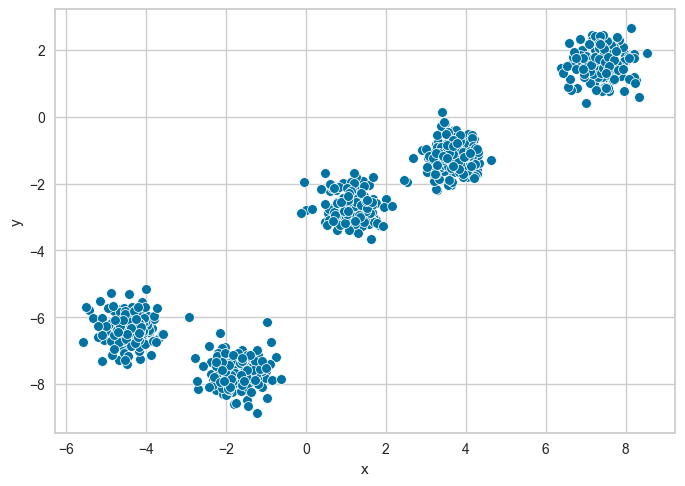

In [8]:
X, y_true = make_blobs(n_samples=800, centers=5, cluster_std=0.40, random_state=25)
X = pd.DataFrame(X, columns=['x', 'y'])

sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');

In [9]:
X.head()

,x,y
0,0.789390,-3.110766
1,7.377301,1.618709
2,-4.738805,-6.207411
3,-3.867114,-7.119361
4,4.020119,-1.157849


## Algorithms

### KMeans

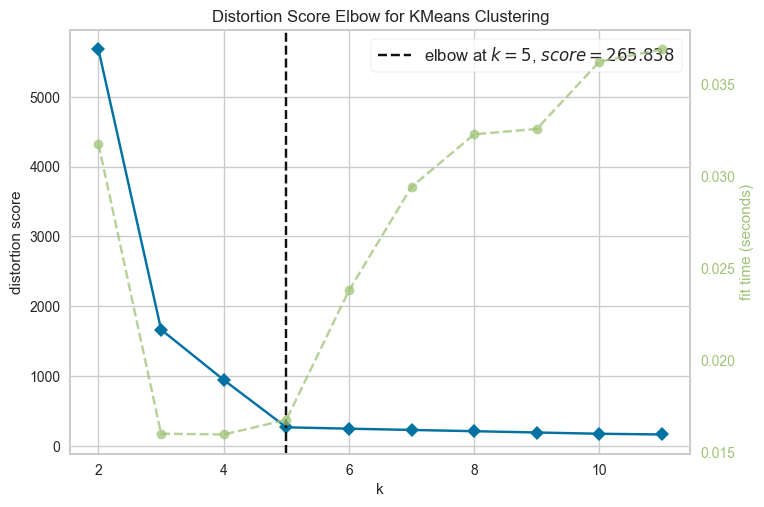

In [10]:
# Using the elbow method, also known as the Elbow Method

# The KElbowVisualizer class implements the "elbow" method to select the optimal number of clusters for KMeans.

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X);
visualizer.show();

The result obtained by the "Elbow" method (blue or solid line) shows that the ideal cluster quantity is equal to 5.

This graph is also important because it shows the time in seconds (green or dashed line) it took to perform the calculations for each `k`.


Once we have the ideal number of clusters we can use the Silhouette metric to evaluate the generated groups.

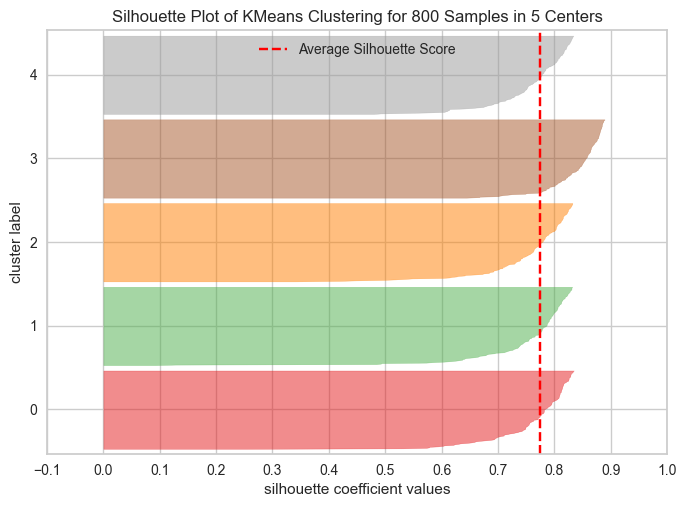

In [12]:
# Viewing the Silhouette metric
model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.show();

The vertical dashed red line is the average score. One way to interpret this is to ensure that each cluster stands out above average, and the cluster scores are reasonable.

We will test with 4, 5, 6 and 7 clusters to evaluate the silhouette metric visualization.

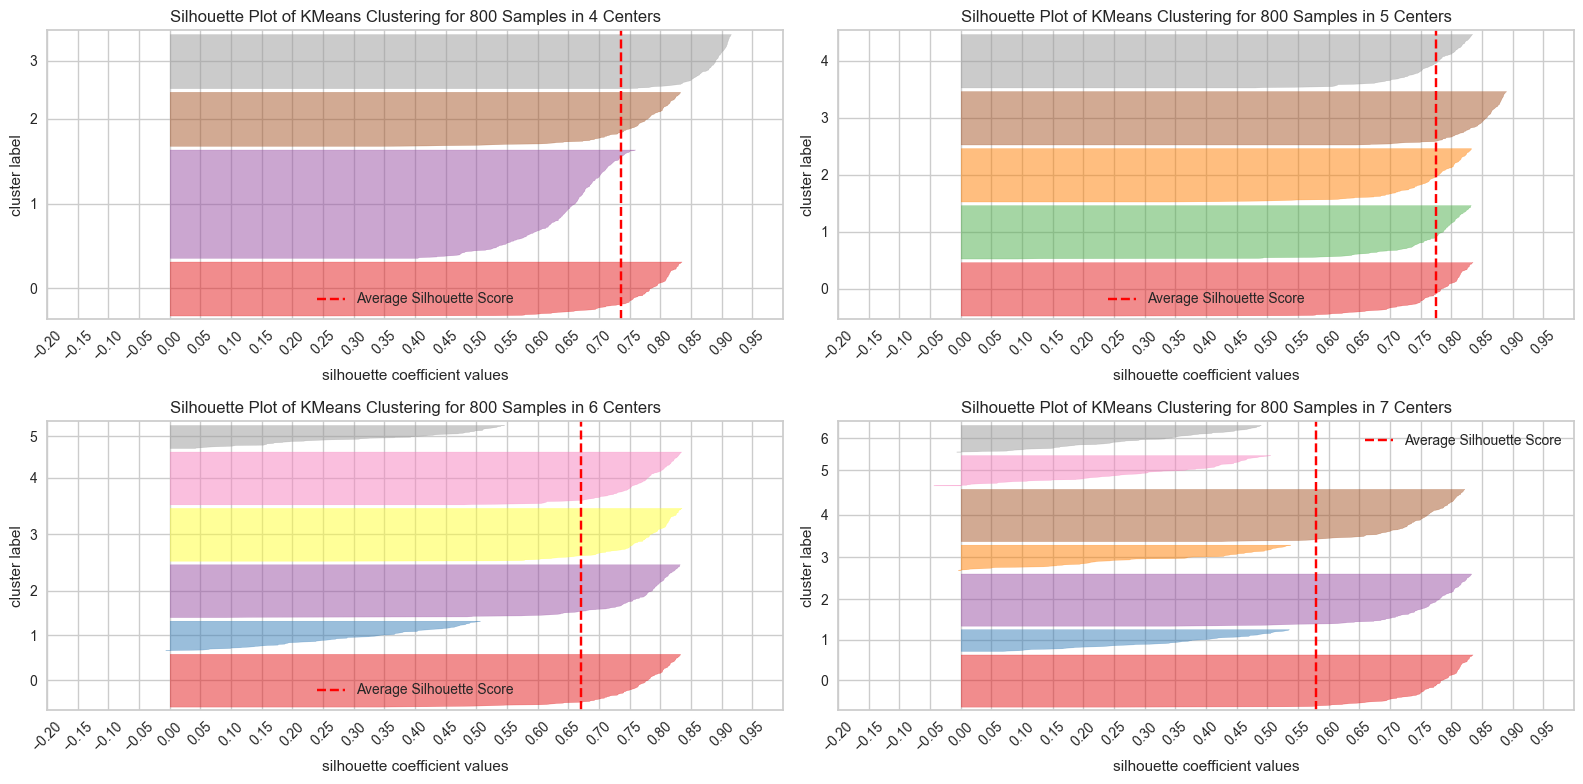

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.reshape(4)

# range(4, 8) will generate the values ​​4, 5, 6 and 7 that we want to test.
for i, k in enumerate(range(4, 8)):
    ax = axes[i]
    model = KMeans(n_clusters=k, random_state=42)
    sil_viz = SilhouetteVisualizer(model, ax=ax)
    sil_viz.fit(X)
    sil_viz.finalize()
    ax.set_xlim(-0.2, 1)
    ax.set_xticks(np.arange(-0.2, 1, 0.05))
    ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()

We can conclude that:

* For **the adjustments with 6 and 7 clusters** (bottom left and right image) had metric values ​​that did not stand out above the average for some groups.
* For the **adjustment with 4 clusters** (top left image) both groups surpass the average, however group 0 surpassed the average by just a few points, but failed to stand out like group 1.
* Finally, in the **adjustment with 5 clusters**, ALL generated groups stood out above average.

In [14]:
kmeans = KMeans(n_clusters=5, random_state=30)
kmeans.fit(X)
labels = kmeans.predict(X)

In [15]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

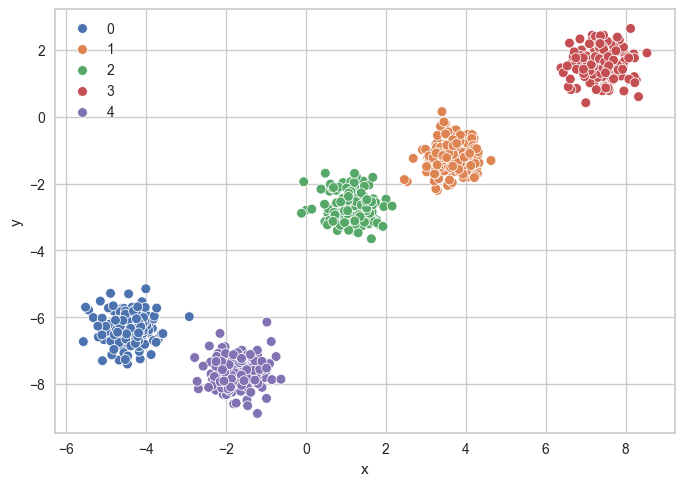

In [16]:
# The `hue` parameter adds the distinct colors based on the `palette` parameter.
sns.scatterplot(data=X, x='x', y='y', hue=labels, s=50, palette='deep');

Thus, we can conclude that KMeans with 5 clusters managed to perform the separation correctly.

### Hierarchical Cluster

This method, also known as Agglomerative Clustering, starts with each sample in its own cluster. It then combines the "closest" clusters. This process will repeat while keeping track of the closest sizes.

After finishing this process, a dendrogram will be created, which is nothing more than a tree that controls when the clusters were created and what the distance metric is.

This way, it will be possible to visualize the clusters (from 1 to the amount of data).

The heights represent the level of similarity of the clusters when they are joined. To find out how many clusters there are in the data, we can "swipe" a horizontal line at the point where it would intersect the highest lines.

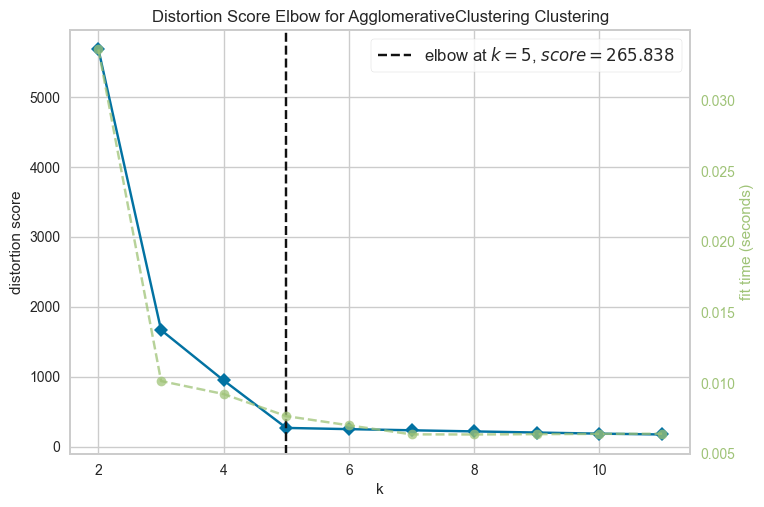

In [18]:
# elbow method
hclust = AgglomerativeClustering(n_clusters=5)
visualizer = KElbowVisualizer(hclust, k=(2,12))

visualizer.fit(X)        
visualizer.show();

The `SilhoutteVisualizer` class does not implement the `predict` method that will be necessary to calculate the silhouette, so we can use the `scipy` library to visualize the dendrogram.

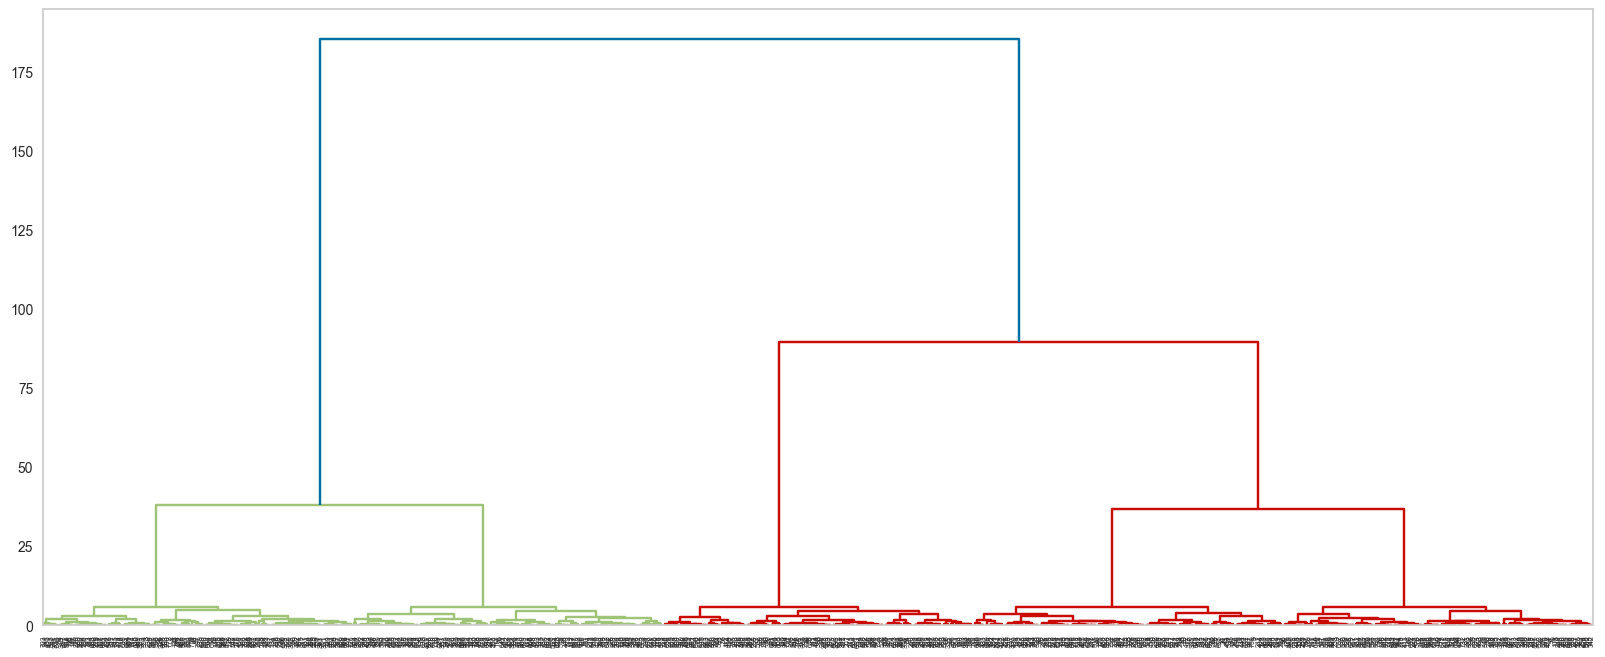

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.grid(False)

# Other methods can be viewed at https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
cluster_aglo = hierarchy.linkage(X, method='ward') # The `ward` method uses an algorithm that minimizes variance

dend = hierarchy.dendrogram(cluster_aglo)

This way, we can visualize how many clusters will be needed, and then we can create a model with Sklearn.

In [21]:
ag = AgglomerativeClustering(n_clusters=5, linkage='ward')
ag.fit(X)

AgglomerativeClustering(n_clusters=5)

The `AgglomerativeClustering` algorithm does not have a predict method, so yellowbrick's `SilhouetteVisualizer` method does not work.

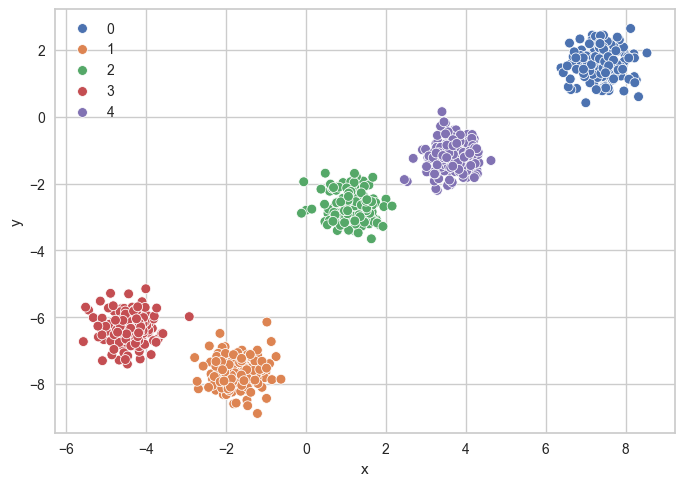

In [22]:
sns.scatterplot(data=X, x='x', y='y', hue=ag.labels_, s=50, palette='deep');

### DBSCAN

---
**ATTENTION**: Check the class slides to understand how the DBSCAN algorithm works.

---

Before understanding how the DBSCAN algorithm works, we need to understand in general how density-based clustering algorithms work.

Density-based clustering algorithms identify distinct clusters in the data set with the idea that a cluster in the data space is an adjacent region of high point density, separated from other clusters by adjacent regions of low point density.

Let's create some data to illustrate this point.

/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/ipykernel_87390/2314684915.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');


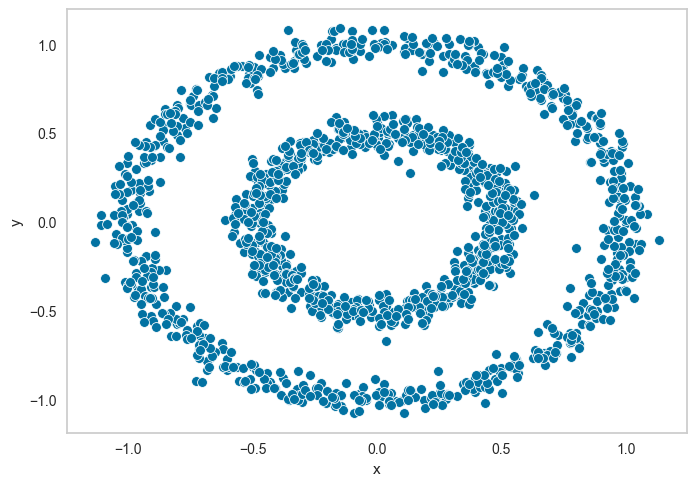

In [25]:
X, y = make_circles(n_samples=1500, factor=.5, noise=.05)

X = pd.DataFrame(X, columns=['x', 'y'])
sns.set_style({'axes.grid' : False})
sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');

As we can see, there are several adjacent points that contain a high density of points (inner and outer circles), being separated by adjacent regions of low density of points.

In this way, DBSCAN can discover clusters with different shapes and sizes in a large amount of data, including data that contains noise.

The **DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*) algorithm uses 2 main parameters:

* `minPts` which is the minimum number of points (a threshold) that must remain together in a given region considered dense.
* `eps` which is the distance measurement that will be used to locate the neighboring points of each point.

In [27]:
X, y = make_moons(200, noise=.05, random_state=0)
X = pd.DataFrame(X, columns=['x', 'y'])

/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/ipykernel_87390/1229253314.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');


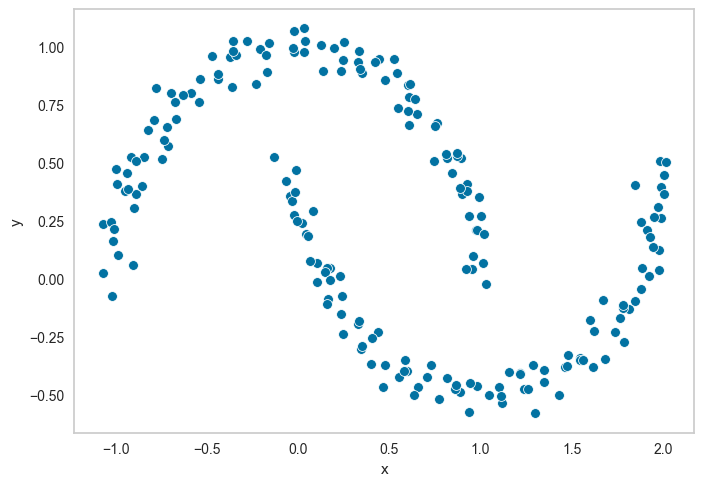

In [28]:
sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');

For this type of data where the boundaries are not linearly separable, KMeans is not a good choice. Let's see how KMeans would find the two clusters:

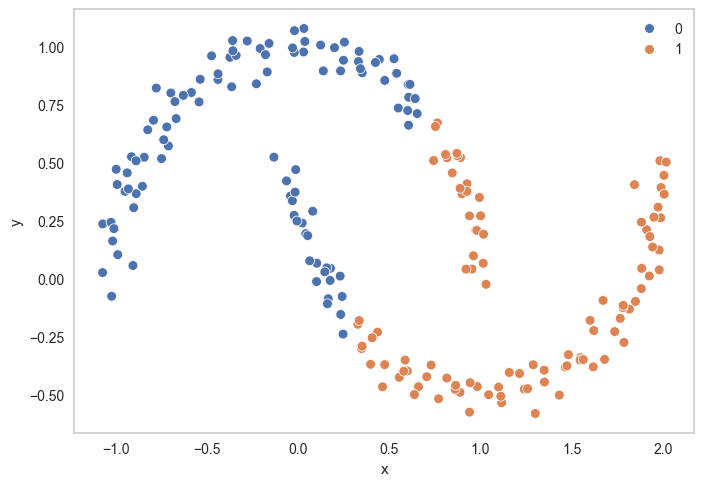

In [29]:
labels = KMeans(n_clusters=2).fit_predict(X)
sns.scatterplot(data=X, x='x', y='y', hue=labels, s=50, palette='deep');

KMeans does not correctly detect both clusters. Let's see if Hierarchical Cluster gets a better result:

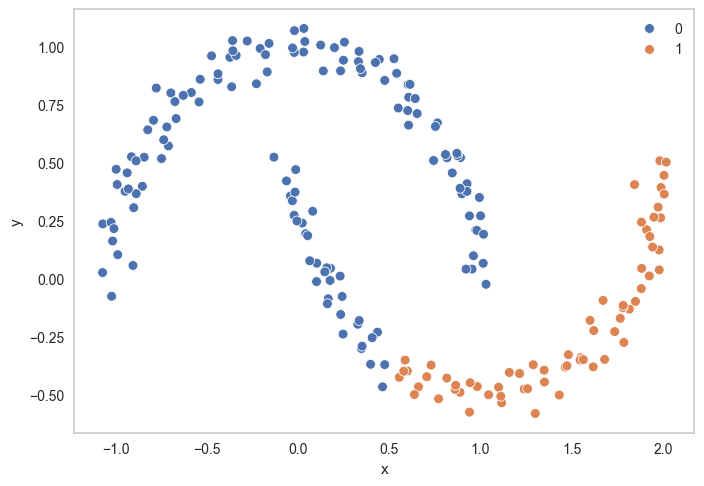

In [30]:
hclust = AgglomerativeClustering(n_clusters=2).fit(X)
sns.scatterplot(data=X, x='x', y='y', hue=hclust.labels_, s=50, palette='deep');

Hierarchical Clustering doesn't do a good job either. It is clear that the density of the points here is extremely important and must be taken into account. The main algorithm that considers the density of points when performing grouping is `DBSCAN`.

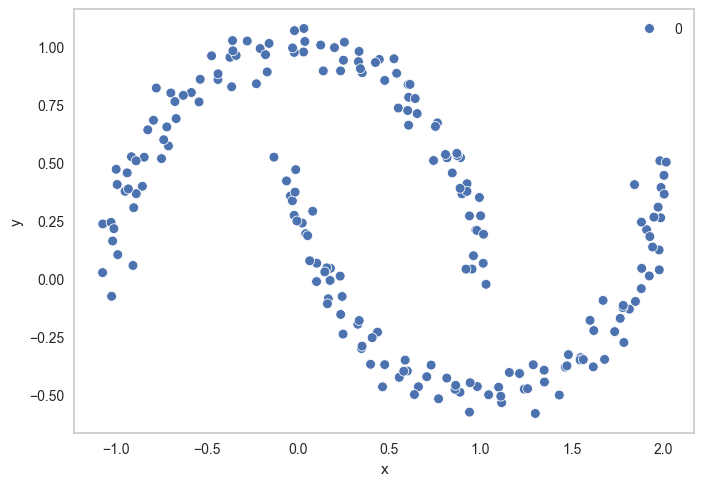

In [32]:
dbscan = DBSCAN()
dbscan.fit(X)
sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

The default radius size `eps` used by DBSCAN is `0.5`. That's why the algorithm found no clusters. Let's decrease this value to `0.2`.

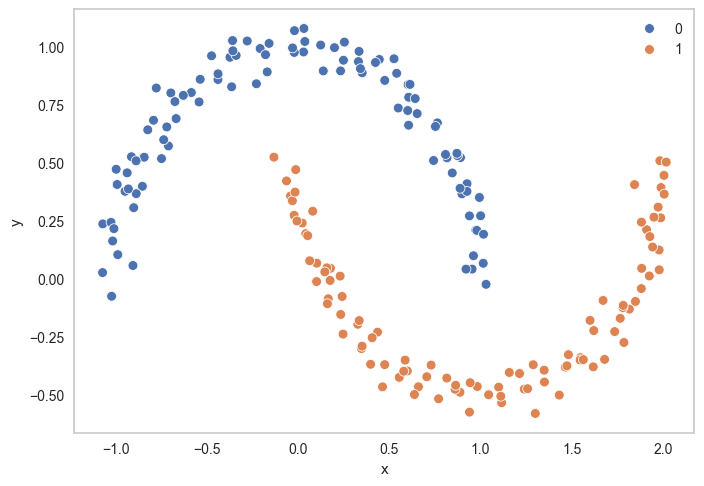

In [33]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)
sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

Now it was able to automatically find the two existing clusters. Just for curiosity's sake, what happens if we decrease the value of `eps` even further? It will probably find points without clusters, which will receive the value `-1` indicating that this point is an outlier (according to `DBSCAN`).

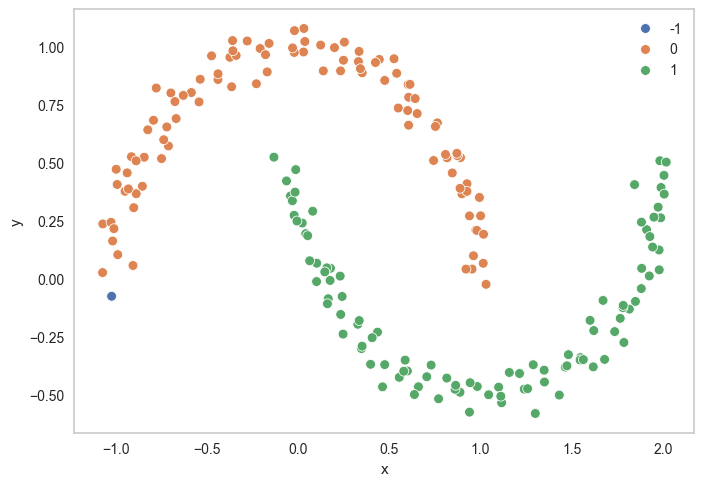

In [34]:
dbscan = DBSCAN(eps=0.15)
dbscan.fit(X)
sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

With `eps=0.15`, `DBSCAN` found an outlier point.

#### Finding the best values ​​for `eps`.

In [38]:
neighbors = NearestNeighbors(n_neighbors=2).fit(X) # Precisa ser 2, uma vez que queremos as distâncias entre dois pontos.
dists, idxs = neighbors.kneighbors(X)

In [39]:
dists[:4]

array([[0.        , 0.01652737],
       [0.        , 0.06272955],
       [0.        , 0.02896776],
       [0.        , 0.11353429]])

In [40]:
idxs[:4]

array([[  0, 192],
       [  1, 168],
       [  2, 149],
       [  3, 171]])

In [42]:
# Now we will order to plot the results
dists = np.sort(dists, axis=0)

dists[:4]

array([[0.        , 0.00268113],
       [0.        , 0.00268113],
       [0.        , 0.00602625],
       [0.        , 0.00602625]])

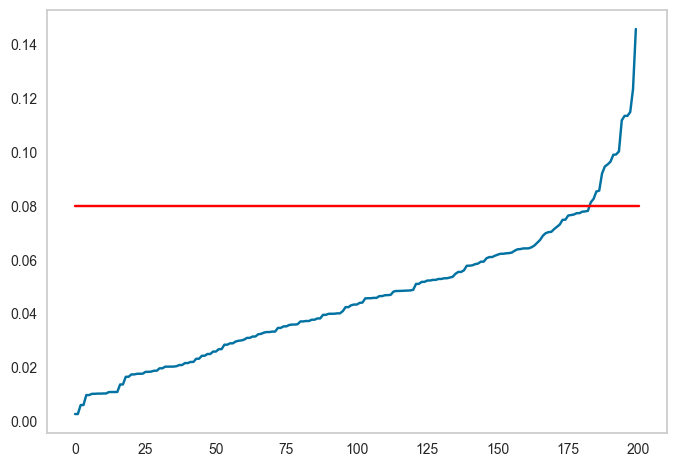

In [43]:
plt.plot(dists[:, 1])
plt.plot([0, 200], [0.08, 0.08], color='red'); # Valores capturados manualmente

## Goodness of fit assessment metrics

### Mapa de Calor

Heat Maps are important for creating aggregated value visualizations of features by cluster. It is also a great visualization tool when our table has many columns (high dimensionality).

In [44]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)

DBSCAN(eps=0.2)

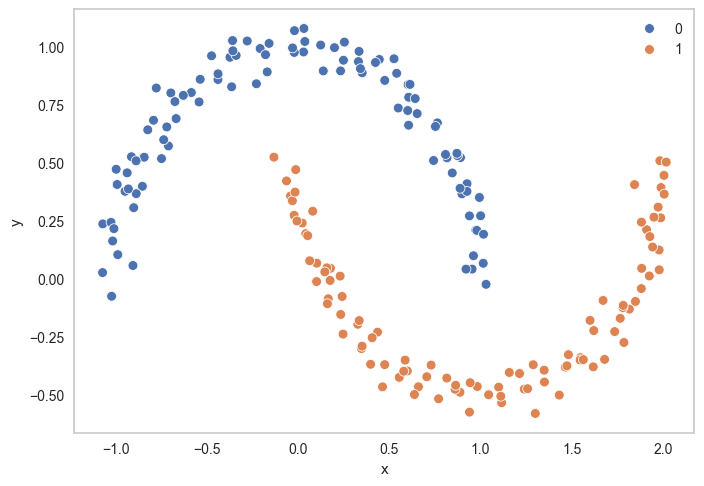

In [45]:
sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

In [47]:
tab = X.groupby(dbscan.labels_).mean()
tab

,x,y
0,-0.005182,0.633201
1,0.998144,-0.128768


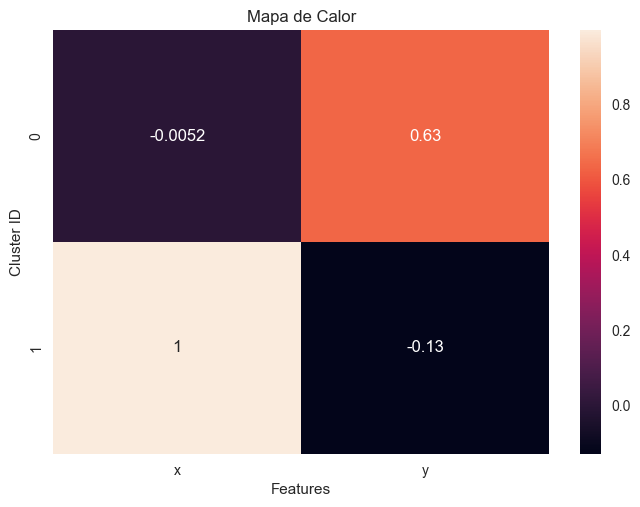

In [48]:
fig, ax = plt.subplots()

sns.heatmap(tab, ax=ax, annot=True);
ax.set_title('Mapa de Calor');
ax.set_ylabel('Cluster ID');
ax.set_xlabel('Features');

With the heatmap it is evident that cluster 1 has a much higher average value of `x` than cluster 0. As we can see in the previously generated graph (Scatter Plot).

### Surrogate Tree

With a training cluster model, the following question may arise: What would be the most important variables to define the clusters?

The heat map should already be able to assist in this process, but a **Surrougate Tree** allows you to automatically select the main **features** (characteristics).

The idea of ​​this method is to train a decision tree with the generated clusters and use them as *labels* in the decision tree and subsequently select the most important *features* generated by the decision tree model.


Let's simulate this scenario, creating a dataset with 15 columns (features) and 800 rows.

In [49]:
X, y = make_blobs(n_samples=800, centers=10, n_features=15, center_box=(-100, 100), cluster_std=0.40, random_state=25)
X = pd.DataFrame(X, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'])
X.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,-65.352705,57.411607,-94.177159,59.250322,38.515571,-0.968986,-82.728181,87.335037,-83.048417,-5.527122,60.968062,-83.101869,-51.673290,78.804634,-4.312503
1,-43.311208,80.180887,33.519749,-8.929151,-42.372939,5.285435,12.468289,48.552535,66.097482,63.874547,-84.395618,28.987730,-37.641425,4.218819,91.230668
2,-18.261360,-78.781166,-82.568332,49.625595,-62.276388,-97.348704,82.743861,85.618405,16.529422,-36.634566,99.505989,-69.895187,98.838944,-74.916388,-29.913263
3,6.282713,-35.793694,60.870781,91.908519,7.723352,0.347727,59.468484,59.326308,-75.548669,-50.902437,25.273475,-24.420320,-87.433298,-24.364240,-85.042048
4,6.118262,-35.609323,61.534510,92.110423,7.845672,-0.521216,60.376786,59.096048,-75.898694,-51.072708,24.955175,-24.377027,-87.016360,-25.567936,-85.262195


In [50]:
X.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.677425,-8.509643,6.550411,-0.134856,13.322040,-35.211209,28.169700,29.292080,0.409463,-14.209278,-2.252118,-45.035847,-3.822535,-14.478258,-10.477571
std,50.185003,55.344073,55.720386,64.752832,43.174330,36.071078,49.508799,54.495652,56.128792,44.996729,59.197308,43.700843,61.871810,49.144244,53.786322
min,-65.837678,-79.004976,-94.177159,-83.089255,-64.190190,-97.658480,-83.011700,-85.934199,-83.993893,-96.885641,-95.525539,-94.006385,-99.598799,-78.363869,-86.089635
25%,-43.579521,-49.441218,-44.227406,-62.742147,-17.749862,-73.581216,3.229503,-12.413904,-40.797471,-49.556280,-55.688542,-81.132525,-51.134831,-67.234870,-60.660529
50%,-6.883492,-35.035874,37.102594,-18.030074,18.049329,-23.747184,45.268769,50.532768,10.437604,-16.131614,6.558185,-64.140591,3.791141,-20.533813,-14.909968
75%,54.992150,58.068551,52.490809,59.059757,52.381430,-1.598032,60.178371,82.607064,35.391392,20.402604,32.103451,-22.763078,43.958208,17.097057,13.443115
max,77.724914,80.787428,62.586834,93.163204,69.703580,6.415402,83.754494,88.347434,100.501188,65.405612,100.534410,32.084262,99.829994,79.379212,92.712361


Unlike the examples above, here we need to do a `feature scaling`, as we have variables at different scales.

In [53]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,0.003378,0.853711,0.000000,0.807589,0.767069,0.929047,0.001700,0.994191,0.005125,0.562929,0.798193,0.086482,0.240314,0.996358,0.457361
1,0.156910,0.996204,0.814581,0.420761,0.162944,0.989143,0.572538,0.771663,0.813525,0.990566,0.056768,0.975442,0.310674,0.523527,0.991713
2,0.331398,0.001401,0.074053,0.752982,0.014293,0.002976,0.993940,0.984341,0.544856,0.371253,0.994755,0.191221,0.995031,0.021855,0.314182
3,0.502362,0.270421,0.989053,0.992881,0.537094,0.941698,0.854371,0.833481,0.045775,0.283338,0.616133,0.551873,0.061002,0.342326,0.005859
4,0.501216,0.271575,0.993287,0.994027,0.538008,0.933349,0.859817,0.832160,0.043878,0.282288,0.614510,0.552217,0.063092,0.334696,0.004628


In [54]:
X_scaled.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.463318,0.441168,0.642543,0.470657,0.578908,0.600028,0.666690,0.661150,0.457483,0.509432,0.475739,0.388376,0.480253,0.404998,0.422882
std,0.349569,0.346350,0.355441,0.367387,0.322452,0.346591,0.296876,0.312687,0.304229,0.277259,0.301935,0.346583,0.310245,0.311546,0.300815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155041,0.185014,0.318630,0.115443,0.346845,0.231348,0.517138,0.421848,0.234133,0.291632,0.203188,0.102100,0.243014,0.070551,0.142219
50%,0.410651,0.275164,0.837436,0.369125,0.614215,0.710181,0.769223,0.783026,0.511837,0.497587,0.520676,0.236860,0.518430,0.366609,0.398092
75%,0.841653,0.857823,0.935597,0.806508,0.870628,0.923002,0.858628,0.967063,0.647092,0.722702,0.650969,0.565017,0.719841,0.605167,0.556665
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


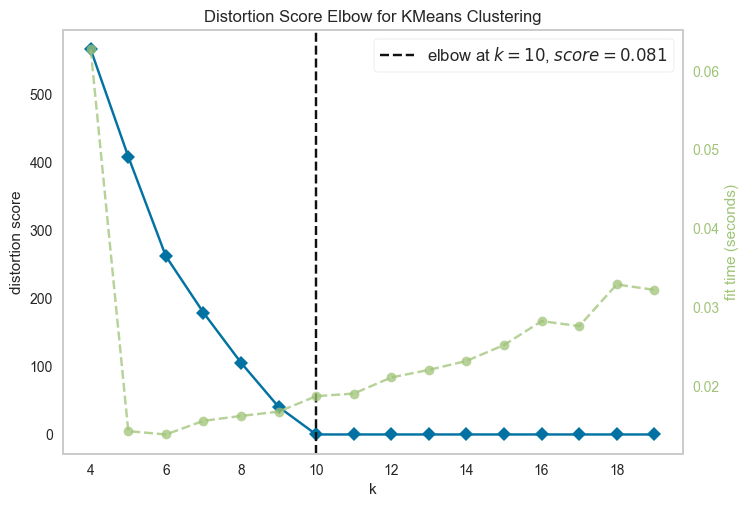

In [55]:
# Finding the optimal cluster number according to the algorithm
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 20))

visualizer.fit(X_scaled)
visualizer.show();

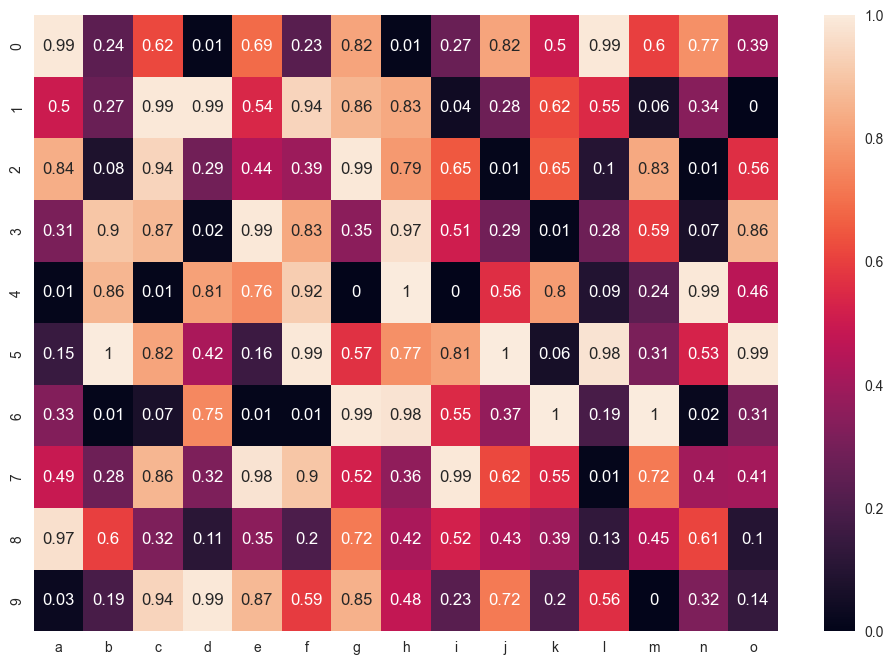

In [56]:
kmeans = KMeans(n_clusters=10, random_state=5)
kmeans.fit(X_scaled)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(X_scaled.groupby(kmeans.labels_).mean().round(2), ax=ax, annot=True);

This heatmap is already quite polluted and looking at it at first glance we cannot clearly distinguish the main clusters. Let's run a decision tree and find the 10 best features.

In [59]:
clf = DecisionTreeClassifier(random_state=30)
clf.fit(X_scaled, kmeans.labels_)

DecisionTreeClassifier(random_state=30)

In [60]:
top_features = pd.Series(clf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False).head(10).index.tolist()

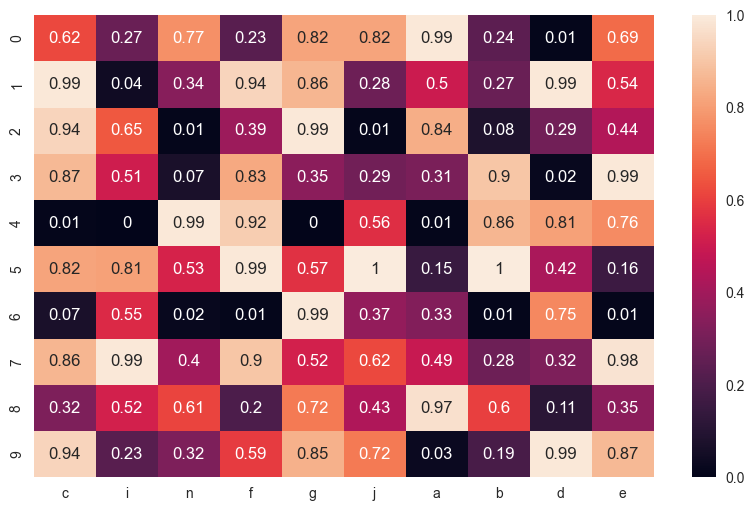

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(X_scaled.groupby(kmeans.labels_)[top_features].mean().round(2), ax=ax, annot=True);

We can see that in Cluster 0, the **features** `c, f, o` are the main features within this cluster.

In [ ]:
#